In [2]:
# Isize_gridport the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import  colors

5 / 500
10 / 500
15 / 500
20 / 500
25 / 500
30 / 500
35 / 500
40 / 500
45 / 500
50 / 500
55 / 500
60 / 500
65 / 500
70 / 500
75 / 500
80 / 500
85 / 500
90 / 500
95 / 500
100 / 500
105 / 500
110 / 500
115 / 500
120 / 500
125 / 500
130 / 500
135 / 500
140 / 500
145 / 500
150 / 500
155 / 500
160 / 500
165 / 500
170 / 500
175 / 500
180 / 500
185 / 500
190 / 500
195 / 500
200 / 500
205 / 500
210 / 500
215 / 500
220 / 500
225 / 500
230 / 500
235 / 500
240 / 500
245 / 500
250 / 500
255 / 500
260 / 500
265 / 500
270 / 500
275 / 500
280 / 500
285 / 500
290 / 500
295 / 500
300 / 500
305 / 500
310 / 500
315 / 500
320 / 500
325 / 500
330 / 500
335 / 500
340 / 500
345 / 500
350 / 500
355 / 500
360 / 500
365 / 500
370 / 500
375 / 500
380 / 500
385 / 500
390 / 500
395 / 500
400 / 500
405 / 500
410 / 500
415 / 500
420 / 500
425 / 500
430 / 500
435 / 500
440 / 500
445 / 500
450 / 500
455 / 500
460 / 500
465 / 500
470 / 500
475 / 500
480 / 500
485 / 500
490 / 500
495 / 500
500 / 500


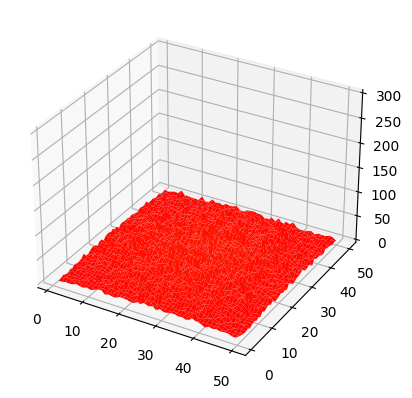

In [15]:

# This is the size of the grid.
size_grid = 50

# This is the maximum number of iterations.
max = 500

# This is the number of particles in the simulation.
nparticles = 50000

# This is the number of iterations between each frame.
nevery = 5

# This is the maximum value of the z-axis.
zmax = 300

# Create the 3D figure object.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the x and y axes.
x = np.linspace(1, size_grid, size_grid)
y = np.linspace(1, size_grid, size_grid)
X, Y = np.meshgrid(x, y)

# Set the minimum and maximum values for the colormap.
vmin, vmax = 0, zmax
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Initialize the location of all the particles to the center of the grid.
locs = np.ones((nparticles, 2), dtype=int) * size_grid//2


# Iterate for max cycles.
for j in range(max):
    # Update the particles' locations at random.
    locs += np.random.randint(-1, 2, locs.shape)

    # If this is the first iteration after a multiple of nevery,
    # create an updated grid and plot it.
    if not (j+1) % nevery:
        grid = np.zeros((size_grid, size_grid))
        for i in range(nparticles):
            x, y = locs[i]
            # Add a particle to the grid if it is actually on the grid!
            if 0 <= x < size_grid and 0 <= y < size_grid:
                grid[x, y] += 1

        print(j+1, '/', max)

        # Clear the Axes of any previous plot and make a new surface plot.
        ax.clear()
        ax.plot_surface(X, Y, grid, rstride=1, cstride=1, cmap=plt.cm.autumn,
                        linewidth=1, vmin=vmin, vmax=vmax, norm=norm)
        ax.set_zlim(0, zmax)

        # Save the plot to a file.
        plt.savefig('diff-{:03d}.png'.format(j//nevery))

# Show the plot.
plt.show()


In [16]:
# Run the simulation.
locs = np.zeros((nparticles, 2))
for i in range(max):
    # Update the particles' locations at random.
    locs += np.random.randint(-1, 2, locs.shape)

# Calculate the expected number of particles in each grid cell.
expected_nparticles = nparticles / grid_size**2

# Calculate the actual number of particles in each grid cell.
actual_nparticles = np.zeros((grid_size, grid_size))
for i in range(nparticles):
    actual_nparticles[locs[i, 0].astype(int), locs[i, 1].astype(int)] += 1

# Calculate the error between the expected and actual number of particles in each grid cell.
error = actual_nparticles - expected_nparticles

# Print the maximum error.
max_error = np.max(np.abs(error))
print("Maximum error:", max_error)

Maximum error: 32.0
